In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,cross_val_score
import pickle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv('scaled_final_data_for_EPL.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.tail()

,HomeTeam,AwayTeam,HT_GSPGAH,HT_GCPGAH,AT_GSPGAA,AT_GCPGAA,HT_GSPG,HT_GCPG,AT_GSPG,AT_GCPG,...,AT_WS4,HT_LS2,HT_LS4,AT_LS2,AT_LS4,H2h_HW,H2h_AW,Drawn,HTWPAH_VS_AT,Result
1895,Liverpool,Wolves,0.790055,0.083333,0.323741,0.225806,0.777419,0.135021,0.354839,0.261603,...,0.0,0.0,0.0,0.0,0.0,0.250,0.000,0.000000,1.0,1
1896,Man United,Cardiff,0.552486,0.000000,0.107914,0.419355,0.558065,0.063291,0.145161,0.746835,...,0.0,1.0,0.0,0.0,0.0,0.125,0.125,0.000000,0.0,-1
1897,Southampton,Huddersfield,0.414365,0.350000,0.071942,0.677419,0.358065,0.316456,0.000000,0.704641,...,0.0,0.0,0.0,1.0,0.0,0.125,0.000,0.500000,0.0,0
1898,Tottenham,Everton,0.674033,0.083333,0.395683,0.341935,0.738710,0.088608,0.458065,0.358650,...,0.0,0.0,0.0,0.0,0.0,0.750,0.000,0.666667,0.6,0
1899,Watford,West Ham,0.317680,0.531250,0.517986,0.432258,0.306452,0.562236,0.422581,0.493671,...,0.0,0.0,0.0,0.0,0.0,0.500,0.375,0.166667,0.5,-1


In [3]:
x=df.iloc[:,2:30]
y=df.iloc[:,30]


In [79]:

h=0
d=0
a=0
for i,row in df.iterrows():
    if row.Result == 1:
        h=h+1    
    elif row.Result == -1:
        a=a+1
    
    elif row.Result == 0:
        d=d+1
    
print(h,d,a)
        
   
    

870 454 576


<BarContainer object of 3 artists>

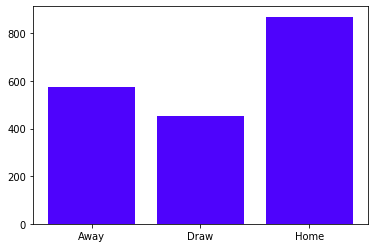

In [155]:
classes =['Away','Draw','Home']
actual =[576,454,870]
xpos=np.arange(len(classes))
plt.xticks(xpos,classes)
plt.bar(xpos,actual,label='',color=[( '#4e03fc'), ('#4e03fc'), ('#4e03fc')])



In [141]:
classes =['Away','Draw','Home']
actual =[225,168,367]
predicted=[139,75,280]

In [142]:
xpos=np.arange(len(classes))

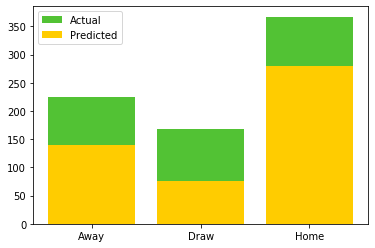

In [151]:
plt.xticks(xpos,classes)
plt.bar(xpos,actual,label='Actual',color=[('#52c234'), ('#52c234'), ('#52c234')])
plt.bar(xpos,predicted,label='Predicted',color=[('#ffcc00'), ('#ffcc00'), ('#ffcc00')])
plt.legend()


In [300]:
algo=['NB','DTC','SVM','LR','ABC']
sup=['60%','64%','66%','67%','67%']
accuracy=['64%','64%','66%','67%','67%']


In [301]:
ypos=np.arange(len(algo))
ypos

array([0, 1, 2, 3, 4])

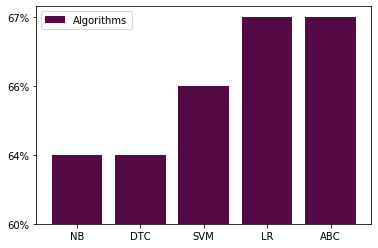

In [317]:
plt.xticks(ypos,algo)
plt.bar(ypos,sup,label='Algorithms',width=0.8 ,color=[('#550a46'), ('#550a46'), ('#550a46'),('#550a46'),('#550a46')])
plt.bar(ypos,accuracy,color=[('#550a46'), ('#550a46')])
plt.legend()

In [376]:
l=['A','B','C','D']
r=[67,67,67,77]
p=[68.55,57,59,69.5]
ypos=np.arange(len(l))
ypos

array([0, 1, 2, 3])

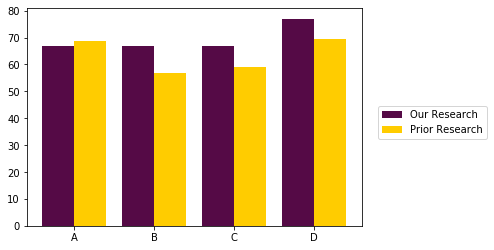

In [377]:
plt.xticks(ypos,l)
plt.bar(ypos-0.2,r,width=0.4,label='Our Research' ,color=[('#550a46')])
plt.bar(ypos+0.2,p,width=0.4,label='Prior Research',color=[('#ffcc00')])
plt.legend(loc=(1.05,0.4))

# Feature Selection Method


In [5]:
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(x,y)

In [6]:
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(x.columns)

In [7]:
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [4]:
# print(featureScores.nlargest(10,'Score'))

In [5]:
# from sklearn.ensemble import ExtraTreesClassifier
# model = ExtraTreesClassifier()
# model.fit(x,y)

In [6]:
# print(model.feature_importances_)

In [7]:

# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

In [ ]:
# new_x =df[['HTWPAH_VS_AT','HT_GSPGAH','AT_GSPGAA','H2h_AW','H2h_HW','Drawn','AT_GCPG','HT_GCPG','AT_WNP','HT_WNP']]
# y=df.iloc[:,30]



# End


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
d= DecisionTreeClassifier(min_samples_split=200)
d.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
round((cross_val_score(d,x,y,cv=10).mean())*100)

0.6427206468760616

In [91]:
from sklearn.svm import SVC
s=SVC(C=0.1,kernel ='linear',probability=True)
s.fit(x,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
round((cross_val_score(s,x,y,cv=10).mean())*100)

0.6612167999988336

In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
n =GaussianNB()
n.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
m=MultinomialNB()
m.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
round((cross_val_score(m,x,y,cv=10).mean())*100

0.5911902210441753

In [96]:
round((cross_val_score(n,x,y,cv=10).mean())*100)

0.6043901784711925

In [97]:
from sklearn.linear_model import LogisticRegression
l= LogisticRegression(C=0.1,penalty='l1')
l.fit(x,y)



c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# pickle.dump(l,open('brain.pkl','wb'))
# k=pickle.load(open('brain.pkl','rb'))
# print(k)

In [98]:
round((cross_val_score(l,x,y,cv=10).mean())*100)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.

0.6690674767197224

In [20]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
g=GradientBoostingClassifier(max_depth=1,n_estimators=100,learning_rate=0.1,random_state=33)
g.fit(x,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=33, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
round((cross_val_score(g,x,y,cv=10).mean())*100)

66.0

In [22]:

a=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=33)
a.fit(x,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=33)

In [ ]:
pd.set_option('display.max_columns',50)
pre_val=df.loc[(df.HomeTeam=='Arsenal') & (df.AwayTeam=='Chelsea')]
pre_val=pre_val.values[0]
pre_val=pre_val[2:30]
pre_val

In [ ]:
d_matrix=d.predict_proba([pre_val])

In [ ]:
matrix_labels=['Away','Draw','Home']
matrix_values=d_matrix.ravel()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.axis("equal")
plt.pie(matrix_values,labels=matrix_labels,radius=1.5,autopct="%.1f%%",shadow=True,colors=colors,explode=[0.0,0.0,0.0])
plt.show()

In [ ]:
s_matrix=s.predict_proba([pre_val])

In [ ]:
matrix_labels=['Away','Draw','Home']
matrix_values=s_matrix.ravel()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.axis("equal")
plt.pie(matrix_values,labels=matrix_labels,radius=1.5,autopct="%.1f%%",shadow=True,colors=colors,explode=[0.0,0.0,0.0])
plt.show()

In [ ]:
n_matrix=n.predict_proba([pre_val])

In [ ]:
matrix_labels=['Away','Draw','Home']
matrix_values=n_matrix.ravel()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.axis("equal")
plt.pie(matrix_values,labels=matrix_labels,radius=1.5,autopct="%.1f%%",shadow=True,colors=colors,explode=[0.0,0.0,0.0])
plt.show()

In [ ]:
m_matrix=m.predict_proba([pre_val])

In [ ]:
matrix_labels=['Away','Draw','Home']
matrix_values=m_matrix.ravel()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.axis("equal")
plt.pie(matrix_values,labels=matrix_labels,radius=1.5,autopct="%.1f%%",shadow=True,colors=colors,explode=[0.0,0.0,0.0])
plt.show()

In [ ]:
l_matrix=l.predict_proba([pre_val])

In [ ]:
matrix_labels=['Away','Draw','Home']
matrix_values=l_matrix.ravel()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.axis("equal")
plt.pie(matrix_values,labels=matrix_labels,radius=1.5,autopct="%.1f%%",shadow=True,colors=colors,explode=[0.0,0.0,0.0])
plt.show()

In [ ]:
g_matrix=g.predict_proba([pre_val])

In [ ]:
matrix_labels=['Away','Draw','Home']
matrix_values=g_matrix.ravel()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.axis("equal")
plt.pie(matrix_values,labels=matrix_labels,radius=1.5,autopct="%.1f%%",shadow=True,colors=colors,explode=[0.0,0.0,0.0])
plt.show()

In [ ]:
a_matrix=a.predict_proba([pre_val])

In [ ]:
matrix_labels=['Away','Draw','Home']
matrix_values=a_matrix.ravel()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.axis("equal")
plt.pie(matrix_values,labels=matrix_labels,radius=1.5,autopct="%.1f%%",shadow=True,colors=colors,explode=[0.0,0.0,0.0])
plt.show()